In [1]:
import time
start_time = time.time()

### Library version

In [2]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.4.5.
The scikit-learn version is 0.23.1.


## Get data

In [3]:
# imports
import numpy as np
import pandas as pd

# set data to df
df = pd.read_csv('./data/enron/03_filtered_dataset.csv', index_col=0)

In [4]:
df.head()

,gender,p_body
0,boy,here is our forecast
1,boy,traveling to have business meeting take the fu...
2,boy,test successful way to go
3,boy,randy can you send me schedule of the salary a...
4,boy,let shoot for tuesday at


In [5]:
df.groupby(['gender']).size()

gender
boy     103852
girl     78971
dtype: int64

## Reclassify data

In [7]:
# bool target variables: boy = 0, girl = 1
df.gender = df.gender.replace('boy', 0)
df.gender = df.gender.replace('girl', 1)

In [8]:
# reclassify data into arrays
full_X = df.p_body.values # features
full_y = df.gender.values # targets (gender labels)

## Multi-class classifier

In [16]:
def get_sample(n=5000):
    # import numpy
    import numpy as np

    # random choice collect index
    sample_idx = np.random.choice(np.arange(len(full_X)), size=n, replace=True)

    # create sample subsets
    Xs = full_X[sample_idx]
    ys = full_y[sample_idx]

    return Xs, ys

In [9]:
def plot_multi(X, y, n_samples=1000, CV=5):
    
    # import numpy
    import numpy as np
    
    # random choice collect index
    sample_idx = np.random.choice(np.arange(len(X)), size=n_samples, replace=True)

    # create sample subsets
    Xs = X[sample_idx]
    ys = y[sample_idx]
    
    
    # import tfidfvectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    t_vect = TfidfVectorizer()
    
    # transform data
    Xs_tfidf = t_vect.fit_transform(Xs)


    # import model selection
    from sklearn.model_selection import train_test_split
    
    # Create train and test sets
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_tfidf, ys, test_size=0.4, random_state=42)

    
    # import models
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import SGDClassifier
    from sklearn.svm import LinearSVC
    from sklearn.neighbors import KNeighborsClassifier

    # import model selection
    from sklearn.model_selection import cross_val_score

    # create models object
    models = [
        RandomForestClassifier(max_depth=25, random_state=42),
        MultinomialNB(),
        LogisticRegression(random_state=42),
        SGDClassifier(),
        LinearSVC(),
        KNeighborsClassifier(),
    ]
    
    # create dataframe, list for data catch
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    # name dict
    name_dict = {
        'RandomForestClassifier':'RFC',
        'LinearSVC': 'LSVC',
        'MultinomialNB':'MNBayes',
        'LogisticRegression':'Logreg',
        'SGDClassifier':'SGDC',
        'KNeighborsClassifier':'KNNc',
    }
    
    # loop models
    for model in models:
        model_name = name_dict[model.__class__.__name__]
        #model_name = model.__class__.__name__
        accuracies = cross_val_score(model, Xs_train, ys_train, scoring='accuracy', cv=CV, n_jobs=-1)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

    # import seaborn
    import seaborn as sns
    # visual formatting
    sns.set(style='white')
    import matplotlib.pyplot as plt
    # figure size
    from matplotlib.pyplot import figure
    figure(figsize=(6, 4), facecolor='w', edgecolor='k')

    # create seaborn plot
    # sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)
    
    plt.title('n_samples: {}'.format(n_samples))
    plt.grid(axis='y', which='both')
    plt.xlabel('Classifiers')
    plt.show()

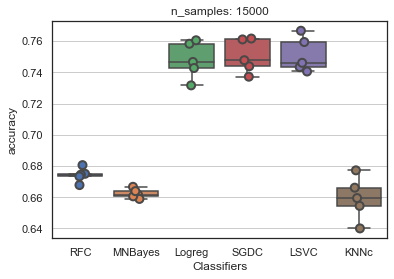

Wall time: 16.5 s


In [10]:
%%time
# Evaluating Classifiers
plot_multi(full_X, full_y, n_samples=15000)

## Variance across sample count

In [11]:
def plot_few(X, y, n_samples=1000, CV=5):
    
    # import numpy
    import numpy as np
    
    # random choice collect index
    sample_idx = np.random.choice(np.arange(len(X)), size=n_samples, replace=True)

    # create sample subsets
    Xs = X[sample_idx]
    ys = y[sample_idx]
  
    # import tfidfvectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    t_vect = TfidfVectorizer()
    
    # transform data
    Xs_tfidf = t_vect.fit_transform(Xs)

    
    # import model selection
    from sklearn.model_selection import train_test_split
    
    # Create train and test sets
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_tfidf, ys, test_size=0.4, random_state=42)

    # import models
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import SGDClassifier
    from sklearn.svm import LinearSVC

    # import model selection
    from sklearn.model_selection import cross_val_score

    # create models object
    models = [
        LogisticRegression(random_state=42),
        SGDClassifier(),
        LinearSVC(),
    ]
    
    # create dataframe, list for data catch
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    # name dict
    name_dict = {
        'RandomForestClassifier':'RFC',
        'LinearSVC': 'LSVC',
        'MultinomialNB':'MNBayes',
        'LogisticRegression':'Logreg',
        'SGDClassifier':'SGDC',
        'KNeighborsClassifier':'KNNc',
    }
    
    # loop models
    for model in models:
        model_name = name_dict[model.__class__.__name__]
        #model_name = model.__class__.__name__
        accuracies = cross_val_score(model, Xs_train, ys_train, scoring='accuracy', cv=CV, n_jobs=-1)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

    # import seaborn
    import seaborn as sns
    # visual formatting
    sns.set(style='white')
    import matplotlib.pyplot as plt
    # figure size
    from matplotlib.pyplot import figure
    figure(figsize=(4, 4), facecolor='w', edgecolor='k')

    # create seaborn plot
    # sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)
    
    plt.title('n_samples: {}'.format(n_samples))
    plt.grid(axis='y', which='both')
    plt.xlabel('Classifiers')
    plt.show()

[ 60000  90000 120000 150000 180000]


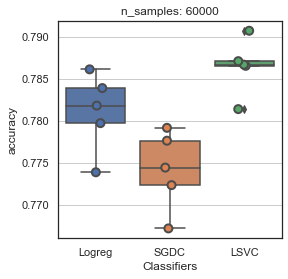

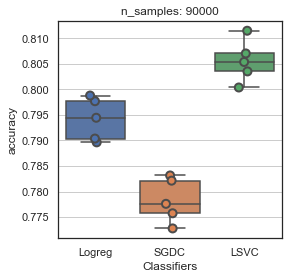

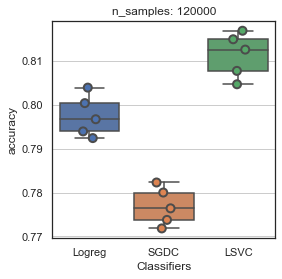

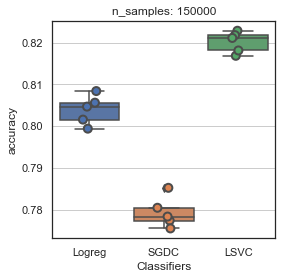

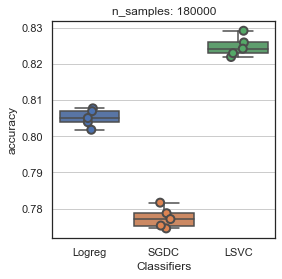

Wall time: 2min 56s


In [12]:
%%time

# numpy
import numpy as np

# review model variation relative to sample input
sample_nums = np.arange(60000, 180001, 30000)
print(sample_nums)

# run charts
for ct in sample_nums:
    plot_few(full_X, full_y, n_samples=ct, CV=5)

> Stochastic Gradient Descent Classifier (SGDC) should have zero mean and unit variance for best performance. For now, we'll stay with Linear SVC.

## Linear support vector classification (LSVC): GridSearchCV

In [13]:
%%time
def lsvc_gridsearchcv(X, y, cv_n=10, test_size=0.4, random_state=42):
    """"""
    # import feature extraction
    from sklearn.feature_extraction.text import TfidfVectorizer

    # import model
    from sklearn.svm import LinearSVC
    
    # pipeline steps
    steps = [
        ('vect', TfidfVectorizer()),
        ('lsvc', LinearSVC())
    ]
    
    # import pipeline, create object
    from sklearn.pipeline import Pipeline
    pipeline = Pipeline(steps)
    
    # create stopwords list
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    
    parameters = {
        'lsvc__C':[0.1, 1, 10, 100],
        'lsvc__max_iter':[10000],
    }
    
    # import model selection
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    
    # Create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # grid search object
    lsvc_cv = GridSearchCV(pipeline, param_grid=parameters, cv=cv_n, n_jobs=-1)
    
    # fit model on training set
    lsvc_cv.fit(X_train, y_train)
    
    # predict test labels
    y_pred = lsvc_cv.predict(X_test)
    
    # import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    
    # generate confusion matrix, classification report
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

    # print params
    print('Tuned LSVC Parameters: {}'.format(lsvc_cv.best_params_))
    print('Tuned LSVC Accuracy: {}'.format(lsvc_cv.best_score_))
    
    return lsvc_cv.cv_results_

Wall time: 0 ns


In [15]:
%%time
lsvc_gridsearchcv(full_X, full_y)

[[36077  5397]
 [ 9553 22103]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     41474
           1       0.80      0.70      0.75     31656

    accuracy                           0.80     73130
   macro avg       0.80      0.78      0.79     73130
weighted avg       0.80      0.80      0.79     73130

Tuned LSVC Parameters: {'lsvc__C': 0.1, 'lsvc__max_iter': 10000}
Tuned LSVC Accuracy: 0.7955839997579987


{'mean_fit_time': array([ 36.24109931,  45.51897216, 113.64169328, 721.74384456]),
 'std_fit_time': array([ 2.14801741,  2.24963535,  2.68046568, 27.54031463]),
 'mean_score_time': array([4.71925492, 5.54563828, 5.96763194, 2.53796914]),
 'std_score_time': array([0.39847542, 3.72937184, 1.29140596, 0.36920674]),
 'param_lsvc__C': masked_array(data=[0.1, 1, 10, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_lsvc__max_iter': masked_array(data=[10000, 10000, 10000, 10000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'lsvc__C': 0.1, 'lsvc__max_iter': 10000},
  {'lsvc__C': 1, 'lsvc__max_iter': 10000},
  {'lsvc__C': 10, 'lsvc__max_iter': 10000},
  {'lsvc__C': 100, 'lsvc__max_iter': 10000}],
 'split0_test_score': array([0.79753874, 0.79407475, 0.77484047, 0.74412033]),
 'split1_test_score': array([0.80191431, 0.79872379, 0.77529626, 0.74621696]),
 'split2_t

## Linear SVC, Run best parameters

In [18]:
%%time

# get smaller sample
Xs, ys = get_sample(25000)

# import feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# import model
from sklearn.svm import LinearSVC

t_vect = TfidfVectorizer()

X_t = t_vect.fit_transform(Xs)

lsvc = LinearSVC(C=0.1, max_iter=10000)

# import model selection
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_t, ys, test_size=0.4, random_state=42)

# fit model on training set
lsvc.fit(X_train, y_train)

# predict test labels
y_pred = lsvc.predict(X_test)

# import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# generate confusion matrix, classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4950  666]
 [1708 2676]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81      5616
           1       0.80      0.61      0.69      4384

    accuracy                           0.76     10000
   macro avg       0.77      0.75      0.75     10000
weighted avg       0.77      0.76      0.76     10000

Wall time: 5.17 s


## Review features

In [21]:
# return features by coefs
def show_most_informative_features(vectorizer, clf, n=30):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names), reverse=True)
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print('Most Informative Features\n(coef score, % of df has feature, feature string)\n')
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print('{:.3f} {}, {:.3f} {}'.format(coef_1, fn_1, coef_2, fn_2))

show_most_informative_features(t_vect, lsvc)

Most Informative Features
(coef score, % of df has feature, feature string)

2.351 kay, -1.704 chris
1.801 sara, -1.324 vince
1.755 sally, -1.234 mark
1.589 kate, -1.188 jim
1.574 susan, -1.086 kevin
1.488 carol, -1.069 phillip
1.414 mann, -1.058 pl
1.348 tana, -1.031 jeff
1.282 michelle, -1.015 richard
1.248 kim, -1.003 mike
1.182 corp, -0.999 sander
1.170 lynn, -0.913 eric
1.159 marie, -0.879 germany
1.121 stephanie, -0.848 rick
1.104 mary, -0.793 dave
1.099 stacey, -0.783 john
1.051 sheila, -0.781 subject
1.043 df, -0.776 best
1.036 jones, -0.750 dan
0.989 elizabeth, -0.744 paul
0.970 stacy, -0.720 robin
0.959 debra, -0.714 kaminski
0.952 shelley, -0.701 james
0.945 eb, -0.696 nemec
0.939 theresa, -0.692 some
0.938 kitchen, -0.684 million
0.938 tracy, -0.682 bass
0.920 lisa, -0.681 darron
0.917 monika, -0.678 giron
0.890 beck, -0.671 bill


## Logistic regression (logreg): GridSearchCV
- Logistic Regression (aka logit, MaxEnt) classifier

In [ ]:
%%time
def logreg_gridsearchcv(X, y, cv_n=10, test_size=0.4, random_state=42):
    """"""
    # import feature extraction
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer

    # import model
    from sklearn.linear_model import LogisticRegression

    # import pipeline
    from sklearn.pipeline import Pipeline

    # import model selection
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV

    # import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    
    # set steps for pipeline
    steps = [
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('logreg', LogisticRegression()),
    ]

    # create pipeline object
    pipeline = Pipeline(steps)
    
    # Create the hyperparameter grid
    c_space = np.logspace(-5, 8, 15)
    parameters = {
        'logreg__C': c_space, 
        'logreg__solver': ['saga'],
        'logreg__max_iter':[500],
    }

    # Create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Instantiate GridSearchCV
    logreg_cv = GridSearchCV(pipeline, param_grid=parameters, cv=cv_n, n_jobs=-1)

    # fit model to data
    logreg_cv.fit(X_train, y_train)

    # predict test labels
    y_pred = logreg_cv.predict(X_test)

    # generate confusion matrix, classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # print params
    print('Tuned Logreg Parameters: {}'.format(logreg_cv.best_params_))
    print('Tuned Logreg Accuracy: {}'.format(logreg_cv.best_score_))

logreg_gridsearchcv(full_X, full_y)

## Logreg, run optimized parameters

In [ ]:
%%time

# import feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# import model
from sklearn.linear_model import LogisticRegression

# import pipeline
from sklearn.pipeline import Pipeline

# import model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# set steps for pipeline
steps = [
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression()),
]

# create pipeline object
pipeline = Pipeline(steps)

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
parameters = {
    'logreg__C': c_space, 
    'logreg__solver': ['saga'],
    'logreg__max_iter':[500],
}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Instantiate GridSearchCV
logreg_cv = GridSearchCV(pipeline, param_grid=parameters, cv=cv_n, n_jobs=-1)

# fit model to data
logreg_cv.fit(X_train, y_train)

# predict test labels
y_pred = logreg_cv.predict(X_test)

# generate confusion matrix, classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Feature Selection [needs section]

## Ending Stats

In [ ]:
# execution time
print("--- {:1.2f} seconds ---".format(time.time() - start_time))

In [ ]:
stop here